In [ ]:
%% Machine Learning Online Class
%  Exercise 7 | Principle Component Analysis and K-Means Clustering
%
%  Instructions
%  ------------
%
%  This file contains code that helps you get started on the
%  exercise. You will need to complete the following functions:
%
%     pca.m
%     projectData.m
%     recoverData.m
%     computeCentroids.m
%     findClosestCentroids.m
%     kMeansInitCentroids.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%

%% Initialization
clear ; close all; clc
graphics_toolkit ("gnuplot");
page_output_immediately(1);

Visualizing example dataset for PCA.



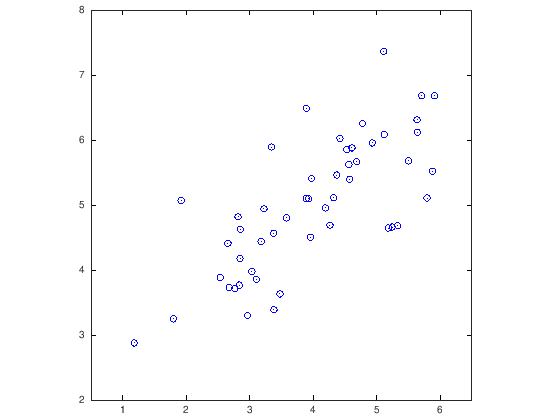

In [15]:
%% ================== Part 1: Load Example Dataset  ===================
%  We start this exercise by using a small dataset that is easily to
%  visualize
%
fprintf('Visualizing example dataset for PCA.\n\n');

%  The following command loads the dataset. You should now have the 
%  variable X in your environment
load ('ex7data1.mat');

%  Visualize the example dataset
plot(X(:, 1), X(:, 2), 'bo');
axis([0.5 6.5 2 8]); axis square;

In [16]:
%% =============== Part 2: Principal Component Analysis ===============
%  You should now implement PCA, a dimension reduction technique. You
%  should complete the code in pca.m
%
fprintf('\nRunning PCA on example dataset.\n\n');

%  Before running PCA, it is important to first normalize X
[X_norm, mu, sigma] = featureNormalize(X);

%  Run PCA
[U, S] = pca(X_norm);

%  Compute mu, the mean of the each feature


Running PCA on example dataset.



Top eigenvector: 
 U(:,1) = -0.707107 -0.707107 

(you should expect to see -0.707107 -0.707107)


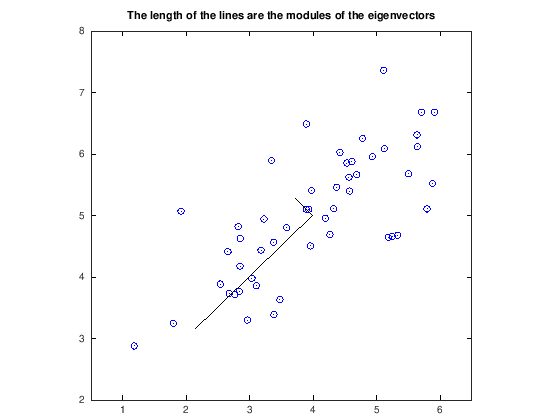

In [17]:
%  Visualize the example dataset
plot(X(:, 1), X(:, 2), 'bo');
axis([0.5 6.5 2 8]); axis square;

%  Draw the eigenvectors centered at mean of data. These lines show the
%  directions of maximum variations in the dataset.
hold on;
drawLine(mu, mu + 1.5 * S(1,1) * U(:,1)', '-k', 'LineWidth', 2);
drawLine(mu, mu + 1.5 * S(2,2) * U(:,2)', '-k', 'LineWidth', 2);
title('The length of the lines are the modules of the eigenvectors')
hold off;

fprintf('Top eigenvector: \n');
fprintf(' U(:,1) = %f %f \n', U(1,1), U(2,1));
fprintf('\n(you should expect to see -0.707107 -0.707107)\n');


Dimension reduction on example dataset.



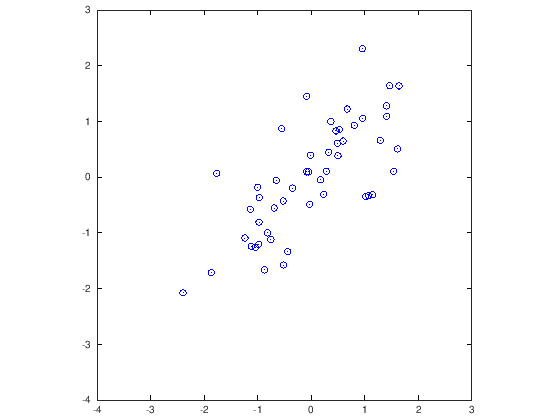

In [8]:
%% =================== Part 3: Dimension Reduction ===================
%  You should now implement the projection step to map the data onto the 
%  first k eigenvectors. The code will then plot the data in this reduced 
%  dimensional space.  This will show you what the data looks like when 
%  using only the corresponding eigenvectors to reconstruct it.
%
%  You should complete the code in projectData.m
%
fprintf('\nDimension reduction on example dataset.\n\n');

%  Plot the normalized dataset (returned from pca)
plot(X_norm(:, 1), X_norm(:, 2), 'bo');
axis([-4 3 -4 3]); axis square

In [19]:
%  Project the data onto K = 1 dimension
K = 1;
Z = projectData(X_norm, U, K);
fprintf('Projection of the first example: %f\n', Z(1));
fprintf('\n(this value should be about 1.481274)\n\n');

X_rec  = recoverData(Z, U, K);
fprintf('Approximation of the first example: %f %f\n', X_rec(1, 1), X_rec(1, 2));
fprintf('\n(this value should be about  -1.047419 -1.047419)\n\n');

Projection of the first example: 1.481274

(this value should be about 1.481274)

Approximation of the first example: -1.047419 -1.047419

(this value should be about  -1.047419 -1.047419)



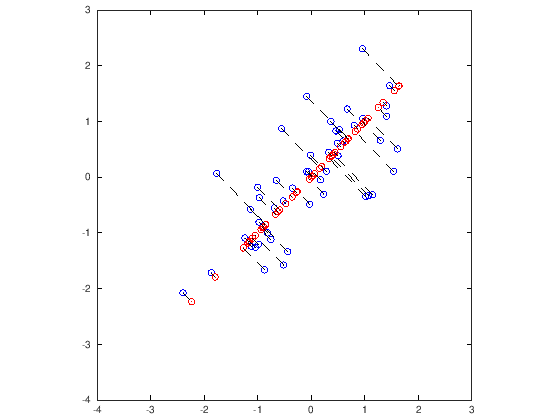

In [20]:
%  Plot the normalized dataset (returned from pca)
plot(X_norm(:, 1), X_norm(:, 2), 'bo');
axis([-4 3 -4 3]); axis square

%  Draw lines connecting the projected points to the original points
hold on;
plot(X_rec(:, 1), X_rec(:, 2), 'ro');
for i = 1:size(X_norm, 1)
    drawLine(X_norm(i,:), X_rec(i,:), '--k', 'LineWidth', 1);
end
hold off


Loading face dataset.



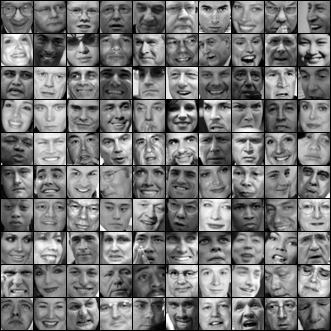

In [21]:
%% =============== Part 4: Loading and Visualizing Face Data =============
%  We start the exercise by first loading and visualizing the dataset.
%  The following code will load the dataset into your environment
%
fprintf('\nLoading face dataset.\n\n');

%  Load Face dataset
load ('ex7faces.mat')

%  Display the first 100 faces in the dataset
displayData(X(1:100, :));